In [71]:
import ast
import csv
import matplotlib.pyplot as plt
import cv2


In [72]:
csv_name = "/Users/harisjabra/Desktop/Chop/Datasets/Pexels/Set2/pexels-anastasia-shuraeva-8510108.csv"

def read_meta_data(row_data):
    meta_data_str = row_data[-1]
    try:
        meta_data = ast.literal_eval(meta_data_str)
        return meta_data
    except:
        raise ValueError("Problem reading metadata")


In [73]:
def read_octo_ann(csv_name):
    with open(csv_name, 'r') as stream:
        reader = csv.reader(stream)
        header = next(iter(reader))
#         print(header)
        for i, row in enumerate(reader):
#             print(row)
            meta_data = read_meta_data(row)
            return meta_data
        
def get_img_roi(cap, meta_data):
    s, img = cap.read()
#     x1,y1,x2,y2 = meta_data['box_xywh']
    x1,y1,h,w = meta_data['box_xyhw']
    y2 = y1 + h
    x2 = x1 + w
    print(x1, x2, y1, y2)
    resize_wh = meta_data['canvas_wh']
    img = cv2.resize(img, tuple(resize_wh))
    print(img.shape)
    img_roi = img[y1:y2,x1:x2,:]
    return img_roi

In [74]:
meta_data = read_octo_ann(csv_name)
print(meta_data)

{'box_xyhw': [102, 68, 185, 166], 'canvas_wh': [720, 420]}


In [75]:
vid_name = csv_name.replace('.csv', '.mp4')
cap = cv2.VideoCapture(vid_name)
img_roi = get_img_roi(cap, meta_data)

102 268 68 253
(420, 720, 3)


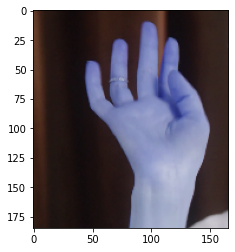

In [76]:
plt.imshow(img_roi)
plt.show()